In [225]:
import numpy as np
import pandas as pd
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns

import json
from datetime import datetime

# Data Validation Exercises

In [11]:
projects_df = pd.read_csv('/root/data2/projects.csv',
                         parse_dates=['project_created_at', 'project_last_pushed_at', 'project_updated_at'])

In [12]:
projects_df

,project_name,project_rank,project_github_clone_url,project_number_of_stars,project_number_of_forks,project_github_id,project_revision,project_created_at,project_last_pushed_at,project_updated_at,project_size,project_checkout_path,project_uses_modules,project_root_module
0,golang/go,1,https://github.com/golang/go.git,72988,10460,23096959,6bf2eea62a3425c57f3d908ec32047a9ae41c025,2014-08-19 04:33:40+00:00,2020-05-28 14:45:33+00:00,2020-05-28 18:49:53+00:00,215283,/root/download/golang/go,False,no-mod
1,kubernetes/kubernetes,2,https://github.com/kubernetes/kubernetes.git,66512,23806,20580498,fb9e1946b0af89998b3e366d49399f6365c94c56,2014-06-06 22:56:04+00:00,2020-05-28 19:09:23+00:00,2020-05-28 18:55:28+00:00,918555,/root/download/kubernetes/kubernetes,True,k8s.io/kubernetes
2,moby/moby,3,https://github.com/moby/moby.git,57189,16540,7691631,763f9e799b7ad2b10e089d546f5a6575ce70f418,2013-01-18 18:10:57+00:00,2020-05-28 18:55:57+00:00,2020-05-28 18:37:46+00:00,153636,/root/download/moby/moby,False,no-mod
3,avelino/awesome-go,4,https://github.com/avelino/awesome-go.git,54733,7267,21540759,3e27d63fe21f95dc41a62dda9b78b2500dc9e0c0,2014-07-06 13:42:15+00:00,2020-05-28 00:00:53+00:00,2020-05-28 18:26:27+00:00,8342,/root/download/avelino/awesome-go,False,no-mod
4,gohugoio/hugo,5,https://github.com/gohugoio/hugo.git,44317,5049,11180687,6a3e89743ccad58097a6dd203a63448946a2304d,2013-07-04 15:26:26+00:00,2020-05-28 17:46:37+00:00,2020-05-28 19:11:19+00:00,88480,/root/download/gohugoio/hugo,True,github.com/gohugoio/hugo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,disintegration/imaging,96,https://github.com/disintegration/imaging.git,3089,271,7042338,879073f2332fabf5a5faa93986ed41598dcf0b62,2012-12-06 20:21:21+00:00,2020-05-26 06:37:58+00:00,2020-05-28 19:09:44+00:00,3438,/root/download/disintegration/imaging,True,github.com/disintegration/imaging
496,gogf/gf,97,https://github.com/gogf/gf.git,3087,450,95761244,269378aa0deaa909348cda1b3bf027f82e52ee66,2017-06-29 09:24:51+00:00,2020-05-28 12:28:20+00:00,2020-05-28 14:38:09+00:00,13103,/root/download/gogf/gf,True,github.com/gogf/gf
497,googleforgames/agones,98,https://github.com/googleforgames/agones.git,3082,356,113473682,d017250c43828b4db4f2d6053f7dafc6695ee4cc,2017-12-07 16:25:22+00:00,2020-05-28 18:00:02+00:00,2020-05-28 17:09:11+00:00,83659,/root/download/googleforgames/agones,True,agones.dev/agones
498,kubernetes-sigs/external-dns,99,https://github.com/kubernetes-sigs/external-dn...,3078,926,81497153,deaeca2ab17fe1f7264cfce02f86be8feed5fc2b,2017-02-09 21:34:27+00:00,2020-05-28 17:00:34+00:00,2020-05-28 12:08:41+00:00,53675,/root/download/kubernetes-sigs/external-dns,True,sigs.k8s.io/external-dns


In [196]:
packages_df = pd.read_csv('/root/data2/packages_0_499.csv').dropna()

In [205]:
packages_df[packages_df['is_standard']==False].groupby('project_name')['package_unsafe_sum'].sum().sort_values(ascending=False)[:20]

project_name
kubernetes/kubernetes           5074
elastic/beats                   3486
gorgonia/gorgonia               3115
weaveworks/scope                2896
mattermost/mattermost-server    2784
rancher/rancher                 2737
cilium/cilium                   2719
rook/rook                       2656
containers/libpod               2576
xo/usql                         2519
ethereum/go-ethereum            2510
concourse/concourse             2445
hashicorp/packer                2376
grafana/loki                    2375
hashicorp/terraform             2360
kubernetes/minikube             2359
jetstack/cert-manager           2350
pachyderm/pachyderm             2306
GoAdminGroup/go-admin           2297
fnproject/fn                    2265
Name: package_unsafe_sum, dtype: int64

In [256]:
packages_df['package_unsafe_sum'].sum()

1990791

In [257]:
packages_df['package_hop_count'].mean()

3.4793760775511533

In [258]:
packages_df[packages_df['package_unsafe_sum']>0]['package_hop_count'].mean()

3.194749983129766

In [259]:
packages_df['project_name'].nunique()

343

In [260]:
packages_df[(packages_df['package_unsafe_sum']>0)&(packages_df['project_name']=='kubernetes/kubernetes')]\
    .groupby(['project_name', 'package_hop_count']).size().unstack().fillna(0)

package_hop_count,0,1,2,3,4,5,6,7,8
project_name,,,,,,,,,
kubernetes/kubernetes,2,10,35,88,25,21,8,2,3


In [261]:
packages_df[(packages_df['package_unsafe_sum']>0)&(packages_df['project_name']=='kubernetes/kubernetes')].count()

name                                         194
import_path                                  194
dir                                          194
is_standard                                  194
is_dep_only                                  194
number_of_go_files                           194
loc                                          194
byte_size                                    194
module_path                                  194
module_version                               194
module_registry                              194
module_is_indirect                           194
project_name                                 194
package_hop_count                            194
package_unsafe_sum                           194
package_geiger_unsafe_pointer_sum            194
package_geiger_unsafe_pointer_variable       194
package_geiger_unsafe_pointer_parameter      194
package_geiger_unsafe_pointer_assignment     194
package_geiger_unsafe_pointer_call           194
package_geiger_unsaf

In [241]:
geiger_df = pd.read_csv('/root/data2/geiger/geiger_findings_0_499.csv')

In [242]:
geiger_df

,text,context,line_number,column,absolute_offset,match_type,context_type,file_name,file_loc,file_byte_size,package_import_path,module_path,module_version,project_name
0,var CacheLineSize uintptr = CacheLinePadSize,type CacheLinePad struct{ _ [CacheLinePadSize]...,20,19,787,uintptr,variable,/usr/local/go/src/internal/cpu/cpu.go,245,7184,internal/cpu,std,std,kubernetes/kubernetes
1,offsetX86HasSSE2 = unsafe.Offsetof(cpu.X86.H...,"\t""unsafe""\n)\n\n// Offsets into internal/cpu ...",14,23,303,unsafe.Offsetof,variable,/usr/local/go/src/internal/bytealg/bytealg.go,23,664,internal/bytealg,std,std,kubernetes/kubernetes
2,offsetX86HasSSE42 = unsafe.Offsetof(cpu.X86.H...,)\n\n// Offsets into internal/cpu records for ...,15,23,358,unsafe.Offsetof,variable,/usr/local/go/src/internal/bytealg/bytealg.go,23,664,internal/bytealg,std,std,kubernetes/kubernetes
3,offsetX86HasAVX2 = unsafe.Offsetof(cpu.X86.H...,\n// Offsets into internal/cpu records for use...,16,23,414,unsafe.Offsetof,variable,/usr/local/go/src/internal/bytealg/bytealg.go,23,664,internal/bytealg,std,std,kubernetes/kubernetes
4,offsetX86HasPOPCNT = unsafe.Offsetof(cpu.X86.H...,// Offsets into internal/cpu records for use i...,17,23,469,unsafe.Offsetof,variable,/usr/local/go/src/internal/bytealg/bytealg.go,23,664,internal/bytealg,std,std,kubernetes/kubernetes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1990786,raw := (*unix.InotifyEvent)(unsafe.Pointer(&bu...,\t\tvar offset uint32\n\t\t// We don't know ho...,244,32,6452,unsafe.Pointer,assignment,/root/go/pkg/mod/github.com/fsnotify/fsnotify@...,337,9452,github.com/fsnotify/fsnotify,github.com/fsnotify/fsnotify,v1.4.7,gwuhaolin/livego
1990787,bytes := (*[unix.PathMax]byte)(unsafe.Pointer(...,\t\t\t}\n\t\t\tw.mu.Unlock()\n\n\t\t\tif nameL...,275,36,7508,unsafe.Pointer,assignment,/root/go/pkg/mod/github.com/fsnotify/fsnotify@...,337,9452,github.com/fsnotify/fsnotify,github.com/fsnotify/fsnotify,v1.4.7,gwuhaolin/livego
1990788,func http2errno(v error) uintptr {,"\n// errno returns v's underlying uintptr, els...",4228,26,145355,uintptr,parameter,/usr/local/go/src/net/http/h2_bundle.go,10277,328343,net/http,std,std,gwuhaolin/livego
1990789,return uintptr(rv.Uint()),//\n// TODO: remove this helper function once ...,4230,10,145435,uintptr,assignment,/usr/local/go/src/net/http/h2_bundle.go,10277,328343,net/http,std,std,gwuhaolin/livego


In [243]:
geiger_df.count()

text                   1990791
context                1990791
line_number            1990791
column                 1990791
absolute_offset        1990791
match_type             1990791
context_type           1990791
file_name              1990791
file_loc               1990791
file_byte_size         1990791
package_import_path    1990791
module_path            1990791
module_version         1990791
project_name           1990791
dtype: int64

In [244]:
item = geiger_df[geiger_df['text'].notna()].iloc[42]

print(item.context)
print("---")
print(item.text)
print("---")
print(item.file_name + ":" + str(item.line_number))


// in asm_*.s
func memhash(p unsafe.Pointer, h, s uintptr) uintptr
func memhash32(p unsafe.Pointer, h uintptr) uintptr
func memhash64(p unsafe.Pointer, h uintptr) uintptr
func strhash(p unsafe.Pointer, h uintptr) uintptr

func strhashFallback(a unsafe.Pointer, h uintptr) uintptr {
	x := (*stringStruct)(a)
	return memhashFallback(x.str, h, uintptr(x.len))
}
---
func strhash(p unsafe.Pointer, h uintptr) uintptr
---
/usr/local/go/src/runtime/alg.go:69


In [245]:
pd.merge(geiger_df, packages_df, how='left',
         left_on=['package_import_path', 'module_path', 'module_version', 'project_name'],
         right_on=['import_path', 'module_path', 'module_version', 'project_name'],
         validate='many_to_one').iloc[:,:20]

,text,context,line_number,column,absolute_offset,match_type,context_type,file_name,file_loc,file_byte_size,package_import_path,module_path,module_version,project_name,name,import_path,dir,is_standard,is_dep_only,number_of_go_files
0,var CacheLineSize uintptr = CacheLinePadSize,type CacheLinePad struct{ _ [CacheLinePadSize]...,20,19,787,uintptr,variable,/usr/local/go/src/internal/cpu/cpu.go,245,7184,internal/cpu,std,std,kubernetes/kubernetes,cpu,internal/cpu,/usr/local/go/src/internal/cpu,True,True,3
1,offsetX86HasSSE2 = unsafe.Offsetof(cpu.X86.H...,"\t""unsafe""\n)\n\n// Offsets into internal/cpu ...",14,23,303,unsafe.Offsetof,variable,/usr/local/go/src/internal/bytealg/bytealg.go,23,664,internal/bytealg,std,std,kubernetes/kubernetes,bytealg,internal/bytealg,/usr/local/go/src/internal/bytealg,True,True,8
2,offsetX86HasSSE42 = unsafe.Offsetof(cpu.X86.H...,)\n\n// Offsets into internal/cpu records for ...,15,23,358,unsafe.Offsetof,variable,/usr/local/go/src/internal/bytealg/bytealg.go,23,664,internal/bytealg,std,std,kubernetes/kubernetes,bytealg,internal/bytealg,/usr/local/go/src/internal/bytealg,True,True,8
3,offsetX86HasAVX2 = unsafe.Offsetof(cpu.X86.H...,\n// Offsets into internal/cpu records for use...,16,23,414,unsafe.Offsetof,variable,/usr/local/go/src/internal/bytealg/bytealg.go,23,664,internal/bytealg,std,std,kubernetes/kubernetes,bytealg,internal/bytealg,/usr/local/go/src/internal/bytealg,True,True,8
4,offsetX86HasPOPCNT = unsafe.Offsetof(cpu.X86.H...,// Offsets into internal/cpu records for use i...,17,23,469,unsafe.Offsetof,variable,/usr/local/go/src/internal/bytealg/bytealg.go,23,664,internal/bytealg,std,std,kubernetes/kubernetes,bytealg,internal/bytealg,/usr/local/go/src/internal/bytealg,True,True,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1990786,raw := (*unix.InotifyEvent)(unsafe.Pointer(&bu...,\t\tvar offset uint32\n\t\t// We don't know ho...,244,32,6452,unsafe.Pointer,assignment,/root/go/pkg/mod/github.com/fsnotify/fsnotify@...,337,9452,github.com/fsnotify/fsnotify,github.com/fsnotify/fsnotify,v1.4.7,gwuhaolin/livego,fsnotify,github.com/fsnotify/fsnotify,/root/go/pkg/mod/github.com/fsnotify/fsnotify@...,False,True,3
1990787,bytes := (*[unix.PathMax]byte)(unsafe.Pointer(...,\t\t\t}\n\t\t\tw.mu.Unlock()\n\n\t\t\tif nameL...,275,36,7508,unsafe.Pointer,assignment,/root/go/pkg/mod/github.com/fsnotify/fsnotify@...,337,9452,github.com/fsnotify/fsnotify,github.com/fsnotify/fsnotify,v1.4.7,gwuhaolin/livego,fsnotify,github.com/fsnotify/fsnotify,/root/go/pkg/mod/github.com/fsnotify/fsnotify@...,False,True,3
1990788,func http2errno(v error) uintptr {,"\n// errno returns v's underlying uintptr, els...",4228,26,145355,uintptr,parameter,/usr/local/go/src/net/http/h2_bundle.go,10277,328343,net/http,std,std,gwuhaolin/livego,http,net/http,/usr/local/go/src/net/http,True,True,20
1990789,return uintptr(rv.Uint()),//\n// TODO: remove this helper function once ...,4230,10,145435,uintptr,assignment,/usr/local/go/src/net/http/h2_bundle.go,10277,328343,net/http,std,std,gwuhaolin/livego,http,net/http,/usr/local/go/src/net/http,True,True,20


# Plots

### Unsafe packages over import hop count

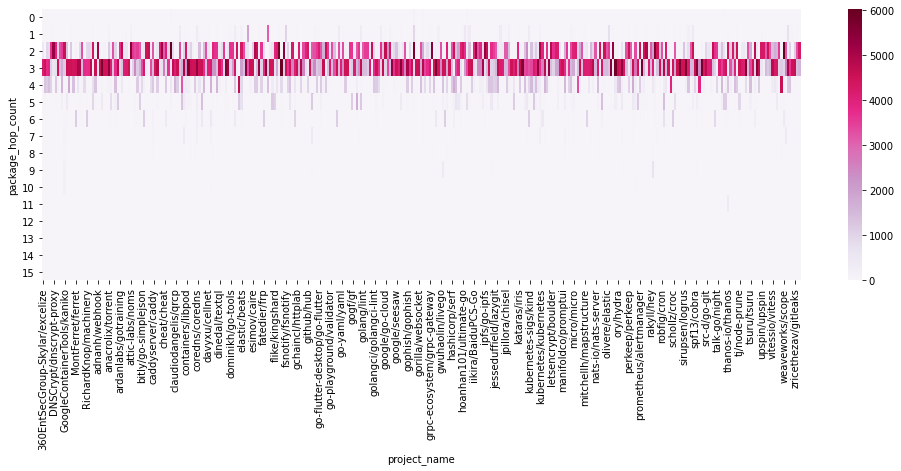

In [239]:
## Version 1: number of unsafe findings of all packages over hop count

df = packages_df\
    .groupby(['project_name', 'package_hop_count'])['package_unsafe_sum'].sum()\
    .unstack().fillna(0).T

# plot heatmap
fig, ax = plt.subplots(figsize=(17,5))
sns.heatmap(df, ax=ax, cmap='PuRd')

# turn the axis label
for item in ax.get_yticklabels():
    item.set_rotation(0)

for item in ax.get_xticklabels():
    item.set_rotation(90)

plt.show()

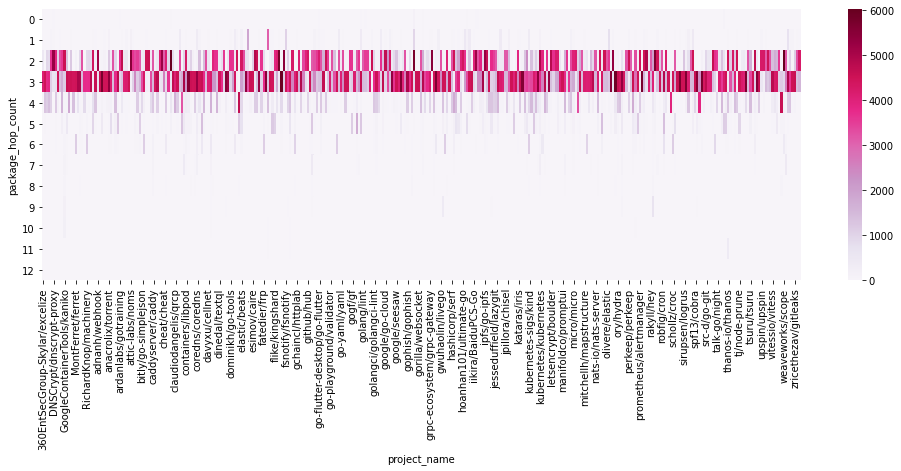

In [250]:
## Version 2: number of unsafe findings of unsafe packages over hop count

df = packages_df[packages_df['package_unsafe_sum']>0]\
    .groupby(['project_name', 'package_hop_count'])['package_unsafe_sum'].sum()\
    .unstack().fillna(0).T

# plot heatmap
fig, ax = plt.subplots(figsize=(17,5))
sns.heatmap(df, ax=ax, cmap='PuRd')

# turn the axis label
for item in ax.get_yticklabels():
    item.set_rotation(0)

for item in ax.get_xticklabels():
    item.set_rotation(90)

plt.show()

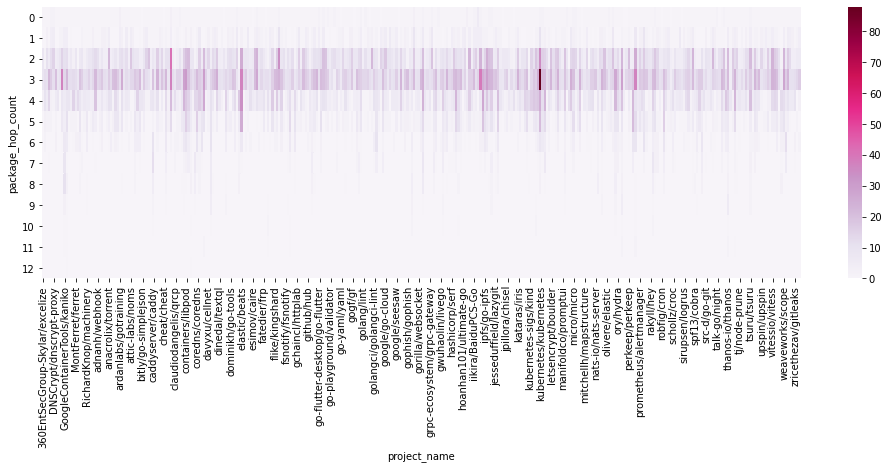

In [251]:
## Version 3: number of unsafe packages (counting only unsafe packages) over hop count

df = packages_df[packages_df['package_unsafe_sum']>0]\
    .groupby(['project_name', 'package_hop_count']).size()\
    .unstack().fillna(0).T

# plot heatmap
fig, ax = plt.subplots(figsize=(17,5))
sns.heatmap(df, ax=ax, cmap='PuRd')

# turn the axis label
for item in ax.get_yticklabels():
    item.set_rotation(0)

for item in ax.get_xticklabels():
    item.set_rotation(90)

plt.show()

In [255]:
## Version 5: number of unsafe packages (counting all packages) over hop count

df = packages_df\
    .groupby(['project_name', 'package_hop_count']).apply(lambda df: np.nonzero(df['package_unsafe_count'])\
    .unstack().fillna(0).T

# plot heatmap
fig, ax = plt.subplots(figsize=(17,5))
sns.heatmap(df, ax=ax, cmap='PuRd')

# turn the axis label
for item in ax.get_yticklabels():
    item.set_rotation(0)

for item in ax.get_xticklabels():
    item.set_rotation(90)

plt.show()

SyntaxError: invalid syntax (<ipython-input-255-8222e8877291>, line 8)

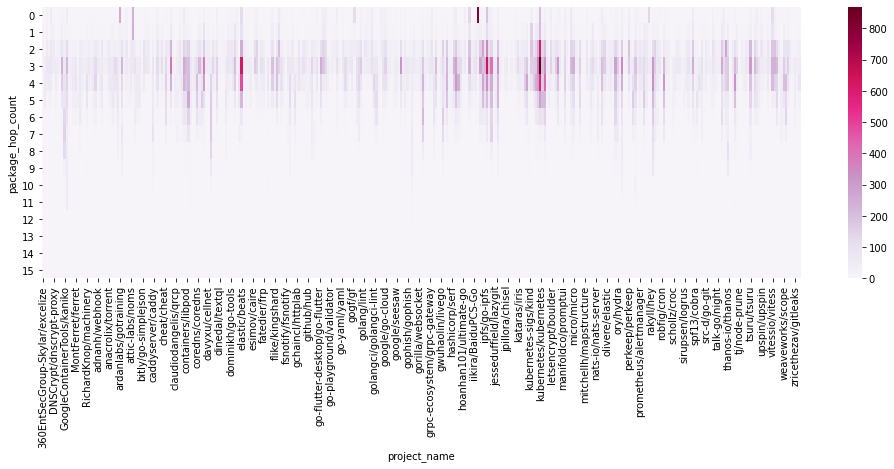

In [248]:
## import hop count distribution

df = packages_df\
    .groupby(['project_name', 'package_hop_count'])['import_path'].count()\
    .unstack().fillna(0).T

# plot heatmap
fig, ax = plt.subplots(figsize=(17,5))
sns.heatmap(df, ax=ax, cmap='PuRd')

# turn the axis label
for item in ax.get_yticklabels():
    item.set_rotation(0)

for item in ax.get_xticklabels():
    item.set_rotation(90)

plt.show()